<a href="https://colab.research.google.com/github/SashaHough/GG3209-Independent-Research-Project/blob/main/IRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment of the Most Appropriate Form of Renewable Energy to Impliment in the Scottish Highlands

* **Authors:** Sasha Hough

* **Student ID:** 240028883

* **Date:** December 7, 2024

**Abstract:**

The present study evaluates the suitability of land in the Highland Council area of Scotland for wind and solar farm implementation. Using spatial data on protected land, town centers, road accessibility, and environmental factors, suitability maps for both renewable energy types were created. For wind farms, wind speed and road proximity were prioritized factors while solar farms considered solar radiation and slope in addition to roads. The resulting maps show that although suitable land is available for both energy sources, wind farms are more favorable because of high and consistent wind speeds while solar farms face constraints from low solar radiation, rugged terrain, and fragmented suitable land. The availability of substations is analyzed to reduce financial costs. Future evaluations could explore tracking solar panels as an alternative to non-tracking ones and consider the impacts of wind farms on the ecology and natural beauty of the Highlands.

**Keywords:** renewable energy, wind power, solar power, Scotland, Highlands

# GitHub Repository
- **GitHub Link:** https://github.com/SashaHough/GG3209-Independent-Research-Project

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Introduction
* Methodology
* Results
* Discussion
* Conclusion
* Appendix
* References


## Introduction

Scotland’s commitment to renewable energy is evident in the quadrupling of its renewable electricity output from 2007 to 2020 (Scottish Renewables, 2021). A continued increase in this output requires an assessment of the feasibility of wind and solar farms across rural Scotland, and in particular the Highland Council area. Unique in its rugged terrain, variability in weather, and sparsely populated landscape, this area presents many opportunities for additional renewable energy infrastructure. The study aims to evaluate the Highland Council’s land suitability for wind and solar farms by assessing factors such as wind speeds, solar radiation, terrain slope, and road access. This study attempts to identify potential areas for renewable energy implementation, providing insights on how this infrastructure can be placed into rural areas with minimal environmental and residential disruption.


## Methodology

### Data and Study Area

All data included in the evaluation were collected in either the form of a tiff or shapefile from their respective creators. Data on protected land and land type was used for both evaluations as neither solar nor wind farms can be built on this land. Town center data was used to prevent building both farms as wind turbines can cause a noise disturbance and areas surrounding town centers are prioritized for residential expansion (UK Government, 2010). Data on roads was similarly used for both, as transport of materials via roads to the sites is essential (Renewables First, n.d.). Yearly average wind speeds at 150m high were used for the wind farm evaluation as the height of wind turbines in Scotland is typically at 150m (Scotland Government, 2014). Solar radiation data was similarly used for solar farm placement along with data on relief as solar farms must be built on flat land (Strategic Land Group, 2022). Data on the area of the Scottish Highland Council was used as this is the area of study. The initial multiple criteria analysis was performed in QGIS (QGIS Development Team, 2024) and visualization of single layer maps along with the creation of figures was undertaken on Google Collaboratory (Google, 2024) using Python (Python Software Foundation, n.d.). Rural Scotland was chosen as the study area as its complicated terrain and land type, weather patterns, land protection, and vast areas of largely uninhabited land make it an interesting case study for the application of on-shore renewable energy and pose limits to the creation of both wind farms and solar farms that make it an ideal study area for a comparison of the two under varying circumstances. The Highland Council was selected for analysis as it encapsulates a large part of rural Scotland and is governed by a single local government, which would allow the proposed implementation of renewable energy to be under the same governing power as opposed to land split between local governments. Future areas of study may expand this area, however, as in the past, objections to renewable energy infrastructure have been approved by the Scottish government despite objections from the Highland Council (Murray, 2024).  



### QGIS Data Processing  

Data on roads in the UK was obtained from Ordnance Survey (2024) as a high volume of vector files that were then merged into a singular map and used to create a proximity map. Town center data was collected from Improvement Service (2024) and a 3-mile radius was removed around each town center. Information on Protected land data was gathered from NatureScot (n.d.) as individual vector files of Sites of Special Specific Interest (areas that represent Scottish natural heritage), Special Areas of Conservation (rare bird nesting sites), Special Protection Areas, National Nature Reserves, and National Parks that were merged into one map. The land type data was collected from SpatialData (2020) as a vector file and types falling under the categories of cliffs or rock pavements, running water, mires, woodlands, scree, built-up land, bogs, and wet grasslands were set to zero/removed. Data on substation sites was obtained as a vector from National Grid UK (2024) where centroids were taken from each site. Outside of individualized processing, all of these vector files were first clipped to the same extent as the Highland Council area, obtained from ArcGIS Open Data (2024), then transformed into raster layers and normalized.  

Solar radiation raster data was collected from Global Solar Atlas (2019) and showed Global Horizontal Irradiance (GHI) which is the radiation used for standard photovoltaic panels that are non-tracking, and more affordable. The wind speed raster data was obtained from Global Wind Atlas (n.d.). Relief, which is also raster data, was transformed into slope. All three were clipped to the same extent as the Highland Council area data and normalized.  

### Suitability Maps

Suitability maps were created using the final, processed maps outlined in the previous section. The wind farm suitability map was created using protected land, land type, and town center maps as constraints with wind speed and roads as factors, weighing 60% and 40% respectively. The solar farm suitability map was created with the same constraints and solar radiation, roads, and slope, as factors, weighing 50%, 35%, and 15% respectively. A second solar farm suitability map was made with the same constraints and only factors of roads (40%) and solar radiation (60%).

From these maps, a 60% solar farm suitability map and an 80% wind farm suitability map were created for comparison. These percentages were chosen as they were the highest percentage that revealed sufficient suitable land for each map.

### Final Wind Farm Map

The final wind farm map was created using the initial wind farm suitability map with the clipped roads vector and substation centroids overlaid on it. A buffer of 2 miles was added to each centroid as solar or wind farms within two miles of a substation would have adequate grid connection without requiring a new substation to be built for the farm (Searchland, 2024). Substations with buffers that had adequate suitable land within them were colored white and unsuitable substations were colored red.  



### Map Visualization

The wind farm and solar farm suitability maps along with the 60% solar farm suitability map and 80% wind farm suitability map were visualized in Google Colaboratory using Rasterio and Matplotlib in Python.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install rasterio

In [ ]:
pip install matplotlib

In [16]:
# Importing libraries
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from IPython.display import Image, display

In [18]:
# Importing wind farm suitability raster data
wind = rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP work/windfarm_suitability.tif')

# Importing solar farm suitability raster data
solar = rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP work/solarfarm_suitability.tif')

# Importing 80% wind farm suitability map
wind80 = rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP work/wind_80_suitability.tif')

# Importing 60% solar farm suitability map
solar60 = rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP work/Solar_60_suitability.tif')

# importing solar farm suitability map without slope
solar_slope = rasterio.open('//content/drive/MyDrive/Colab Notebooks/IRP work/Solar farm suitability without slope.tif')

## Results

### Suitability Maps

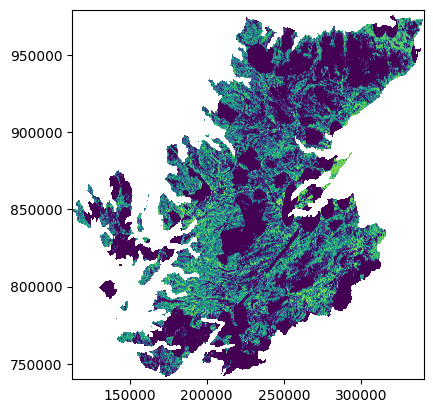

<Axes: >

In [8]:
# Visualising wind farm suitability map
show(wind)

Figure 1. Suitability map of wind farms in the Highland Council. Suitability appears as a gradient where lighter land is most suitable and dark land is unsuitable.

There appears to be a substantial amount of land that's fairly suitable for the implementation of wind farms in figure 1. Although, there is a substantial amount of land completely unsuitable for them, much of which is fragmented into small areas. The main areas with the highest suitability appear to be located in the SW, SE, and NE. The entirety of the Highland Council area, however, appears to be fairly suitable for wind farm placement.

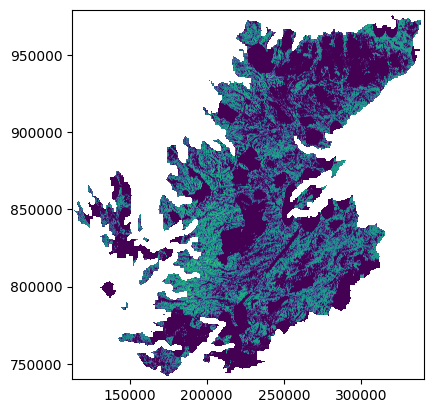

<Axes: >

In [14]:
# Visualising solar farm suitability map
show(solar)

Figure 2. Suitability map of solar farms in the Highland Council. Suitability appears as a gradient where lighter land is most suitable and dark land is unsuitable.

From Figure 2, highly suitable land for solar farms appears to be much more limited than seen for wind farms in Figure 1. The land with the highest suitability appears to be located in the SE, with some additionally found in the far NE of the Highland Council area. An additional analysis of solar farms was conducted where slope was removed as a factor as shown in Figure A1 (Appendix). This did not yield a substantial difference in results. It was observed that the suitability of land decreased as more weight was put on solar radiation and proximity to roads. While the extent of available land is the same for both wind and solar farms, it appears that there appears to be more land with higher suitability for wind farms.

<Axes: >

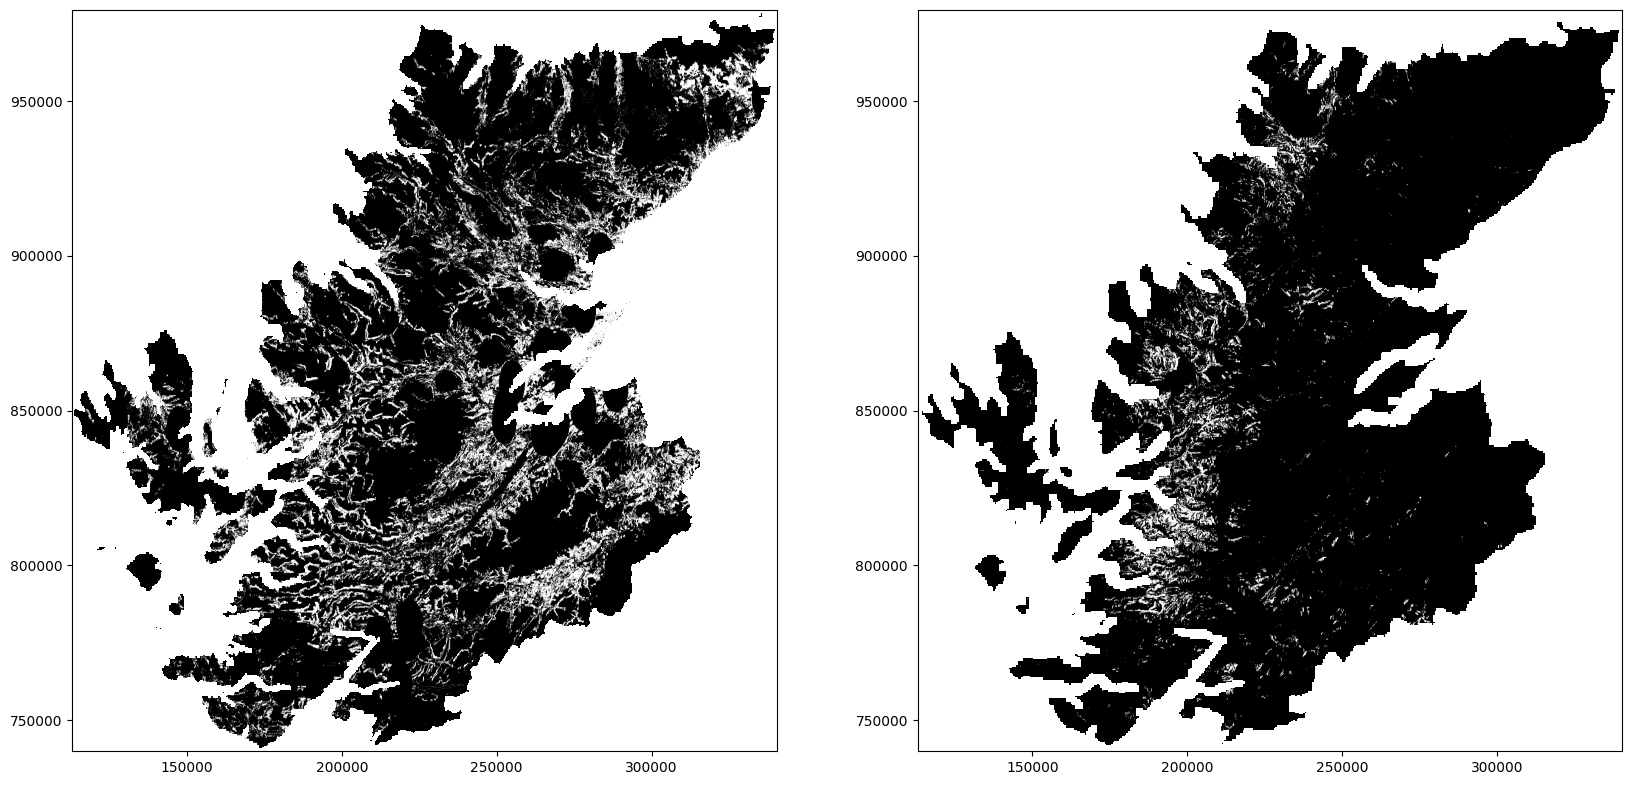

In [15]:
# Plotting the two maps side by side
fig, axs = plt.subplots(1,2, figsize = (20, 17))
# Visualising 80% wind farm suitability map
show(wind80, cmap = 'gray', ax=axs[0]) # cmap to make it black and white
# Visualising 60% solar farm suitability map
show(solar60, cmap = 'gray', ax=axs[1])

Figure 3. Map of areas that are 80% or more suitable for wind farms (left). Map of areas that are 60% or more suitable for solar farms (right). Suitable land is white and unsuitable land is black.

Figure 3 acts to confirm observations made from both Figure 1 and Figure 2. There is not only substantially more suitable land available for wind farms but the land is more suitable than that available for solar farms. Land that is 80% or more suitable for wind farms appears to be more fragmented in the SW of the Highland Council area where areas that may be better for the placement of many turbines could be in the SE where land that is 80% or more suitable appears to have much smaller breaks in it of unsuitable land. Land of 60% or more suitability for solar farms appears to be quite limited. Similarly to Figure 2, it appears that although the same amount of land is available, it is not as suitable for the placement of solar farms. Land that is most suitable is primarily located in located along the east coast of the Highland Council, particularly in the South.

### Final Wind Farm Map

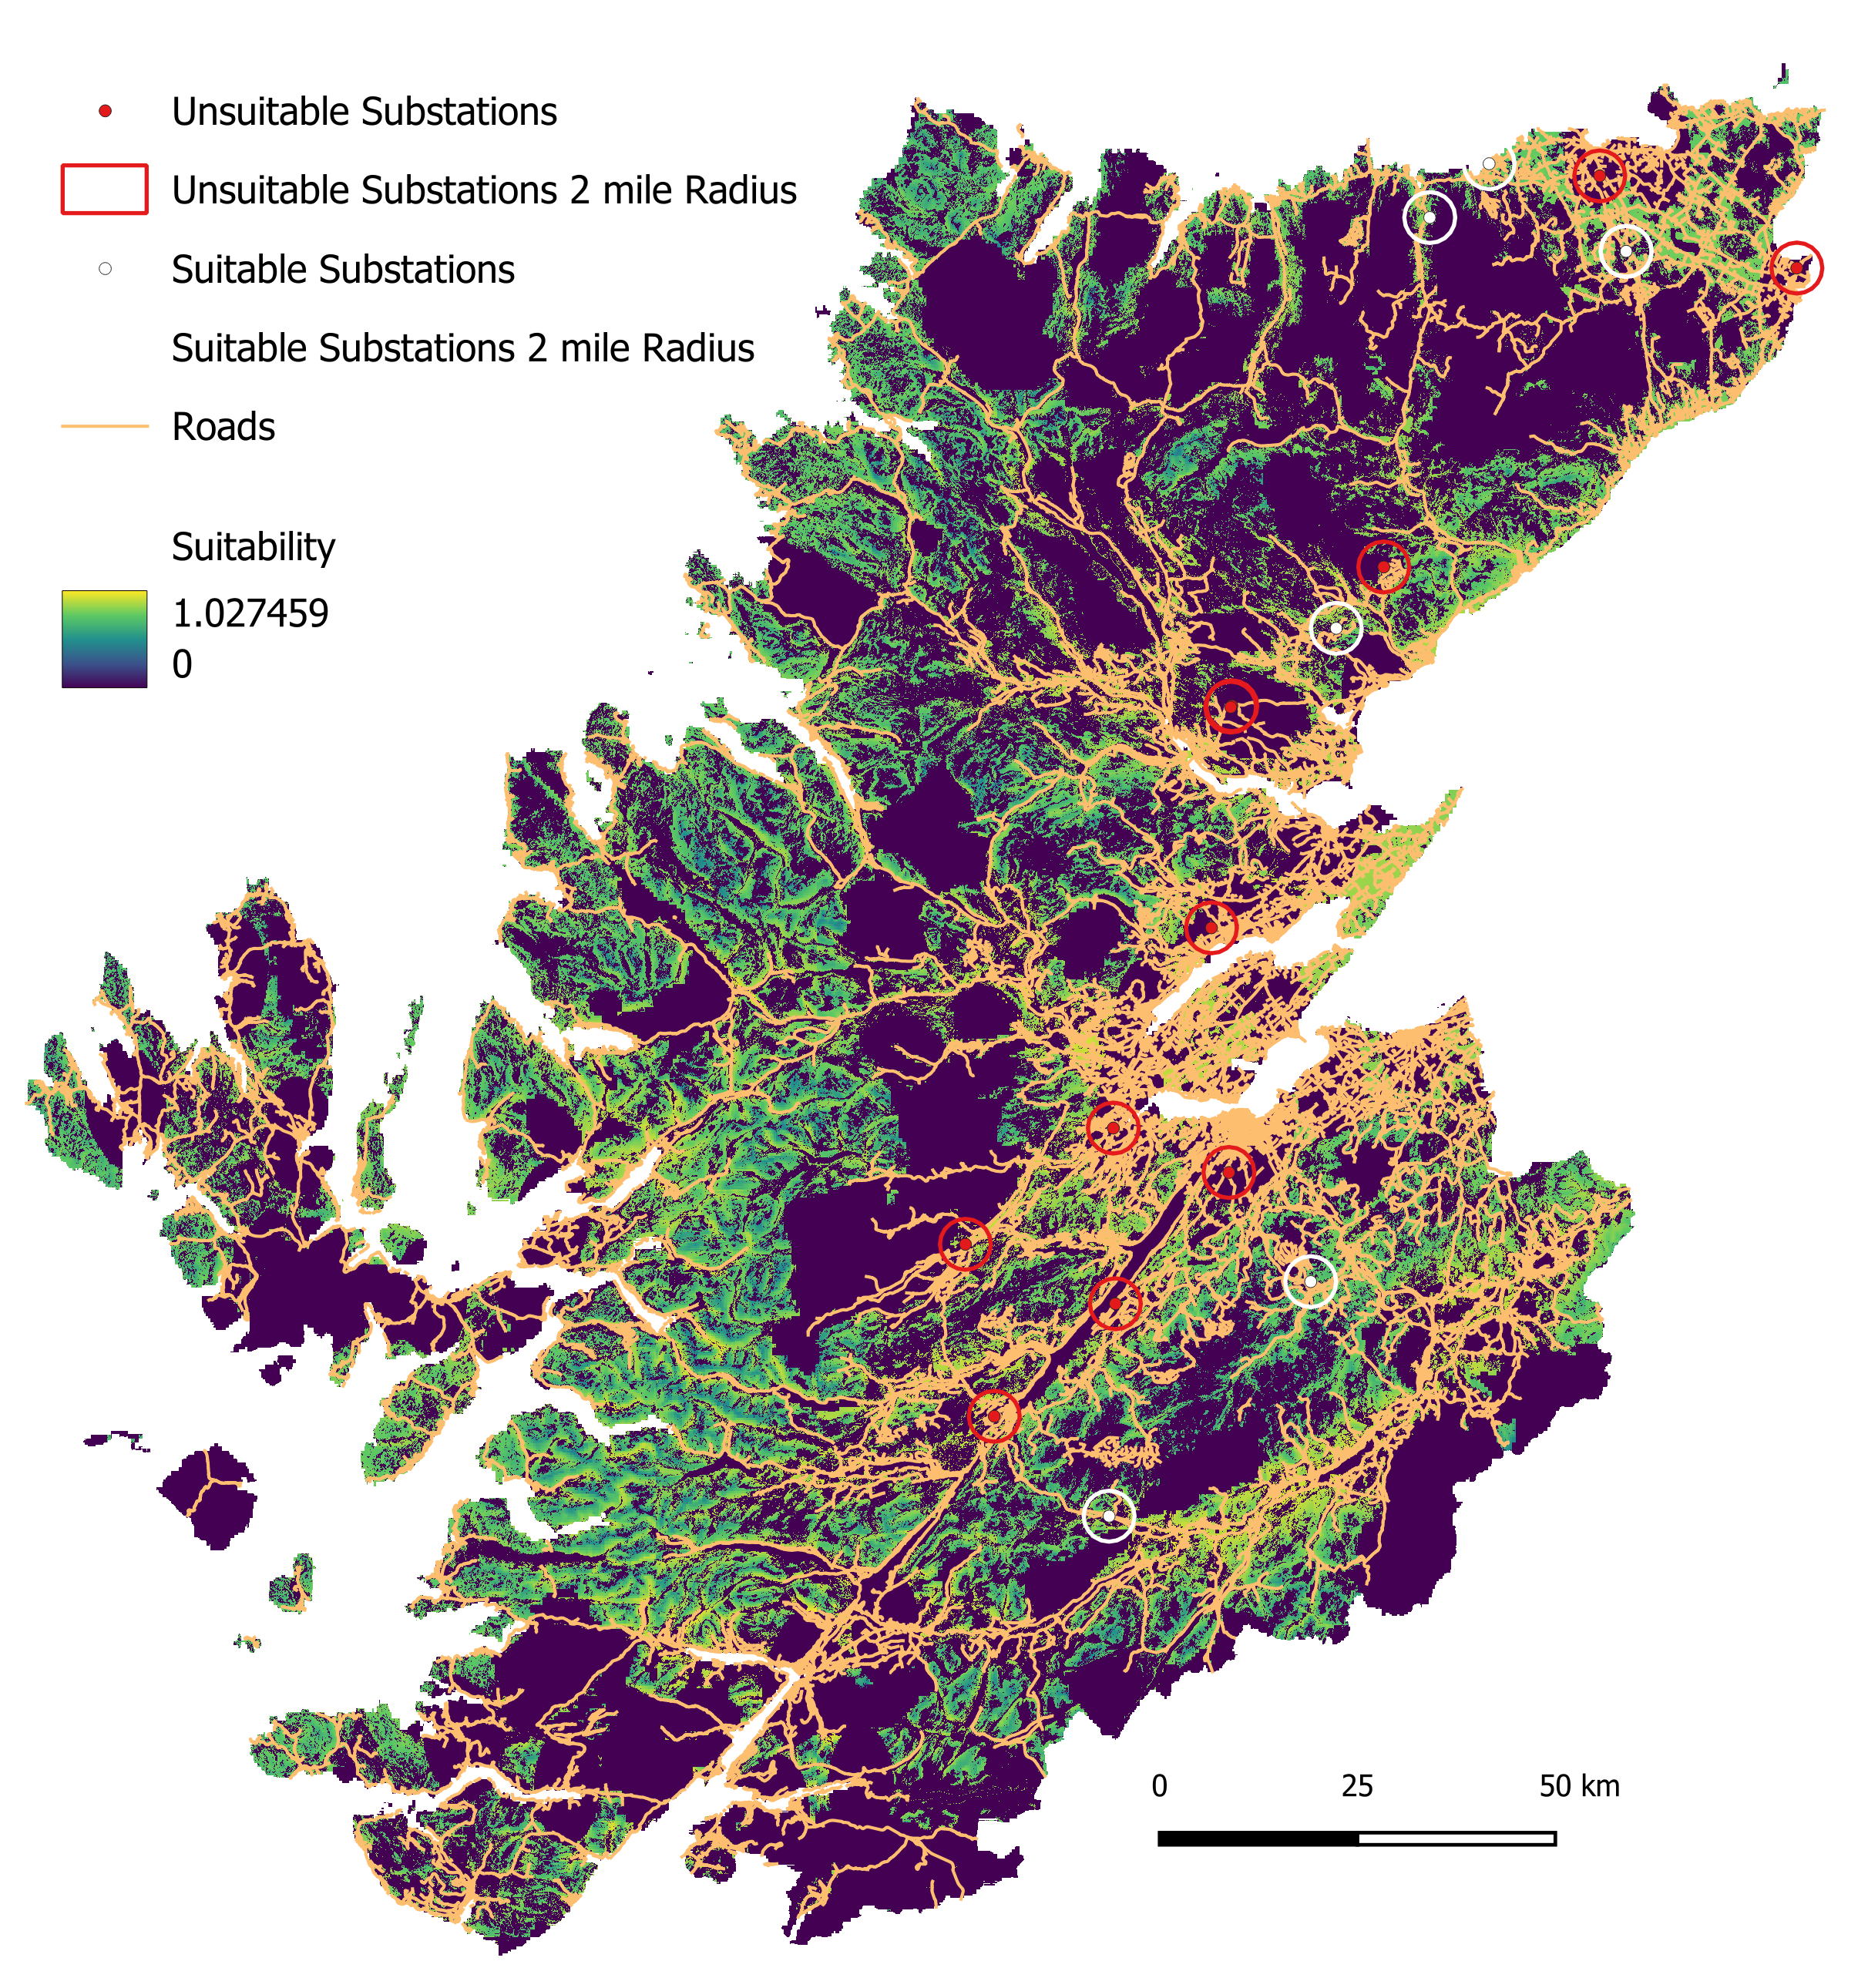

In [17]:
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/IRP work/final wind farm suitability map2.png'))

Figure 4. Suitability map of wind farms with roads and substations, along with their 2 mile radius, overlaid.

In Figure 4, the East border of the Highland Council area appears to have much more road coverage, indicating that it has higher accessibility and may be the cause of the more suitable land in this area. The amount of highly suitable land in the west, however, appears to be limited by road access. While much of this land is available, and likely has suitable wind speeds, the absence of roads to access it severely limits its use for the placement of wind farms. Furthermore, the heavier presence of roads in the east appears to have a relationship with the substation location. While many substations appear unsuitable as there is a lack of sufficient available land in their 2-mile radius, 6 of them have both available land that is quite suitable and high proximity to roads.

## Discussion

The fragmentation of suitable land for wind and solar farms indicates it may be even more ideal for wind farms as wind turbines both can and must be spaced out. A 25 MW wind turbine requires 410 meters between it and the next wind turbine (Renewables First, n.d.), indicating that the fragmentation visible in much of the suitable land is not limiting, as wind turbines may easily be placed around them. This is not the same case for solar farms, which require a uniform area of cohesive land to be built on.   

It was previously hypothesized that the main factor causing the decrease in suitability for solar farms was slope, as much of the Highland Council area has rugged terrain and lacks larger areas of flat land. The decrease in suitability following its removal, however, indicates that it is actually the amount of global horizontal irradiance (GHI) that is causing the differences observed between wind and solar farm suitability. This is largely due to the decision to implement non-tracking panels that primarily absorb GHI since it is mostly diffused by the atmosphere. A switch to the use of tracking solar panels, that rotate to follow the sun, may reveal more highly suitable land as they use direct normal irradiance (DNI) which is solar radiation coming straight from the sun and is not diffused, providing more solar radiation to the solar panel (Kosmopoulos, 2023). While this switch may result in more suitable land, it comes at an increased financial cost that may likely make it a less suitable option than wind farms. Future evaluations may investigate this further to determine if it is a viable option.   

It may ultimately be determined that the implementation of wind farms is a more appropriate form of renewable energy given the highly suitable nature of the land in the Highland Council area for wind turbines. As revealed in Figure 1, Figure 2, and Figure 3, land in the highlands is substantially better suited for wind turbines than solar farms. Alldritt and Hopwood (2010) similarly concluded this, attributing it to the consistent and strong winds present in the highlands. From the present analysis, it can additionally be concluded that wind speeds are the determining factor in the differences between the suitability of land for solar and wind farms. This is paired with the low levels of solar radiation received in the Highlands due to cloud cover as found by Sreckovic (2024). Alldritt and Hopwood (2010) further discussed the proximity to the sea and sparsely populated areas that increase wind and prevent disruption to human activity that other regions may be limited by.   

Within the Highland Council area, land of high importance for wind farm placement lies near the suitable substations. These areas would greatly reduce the cost of the wind farms as they provide a suitable substation that can provide an output for the energy produced by the turbines (Searchland, 2024). In other cases, this substation must be built nearby, greatly increasing the financial cost of the wind farm. These sites also have high access by road as the substations must also be accessible. While these sites in particular are highly suitable, land in the SE and along the east coast in general has substantial road coverage that would easily allow the placement of a wind farm. The West similarly displays a high volume of possible sites, however these options may be more limited due to inaccessibility.   

The implementation of wind farms in the highlands, however, does not come without concern. The Highland Council has objected to several wind farms in the past as they have concerns about wind turbine disruption to the scenic beauty that generates a large economic income from tourists. They similarly worry about its impact on the native ecosystems (McMorran, 2024). While this concern was addressed in the removal of protected and unsuitable lands, the cascading effects of adding turbines to these natural areas may result in impacts not investigated in this evaluation. Future studies may focus on the impacts of wind turbines and solar farms as this may be a more important deciding factor than land suitability.   

## Conclusion

It could be concluded that the Highland Council land has higher suitability for wind farm development than solar farms. High and consistent wind speeds along with flexibility in wind turbine placement make wind farms a more viable renewable energy source. Solar farms, on the other hand, face challenges that make them less suitable including low solar radiation (GHI) and limited expanses of suitable, flat land. Wind energy is therefore the more practical option, its suitability is increased within optimal sites that allow for access to both roads and suitable substations. Future studies could explore tracking solar panels as a possible way to increase solar farm suitability and consider ecological and natural beauty impacts alongside public opposition, which may result in continued objections to wind farms by the Highland Council.

## Appendix


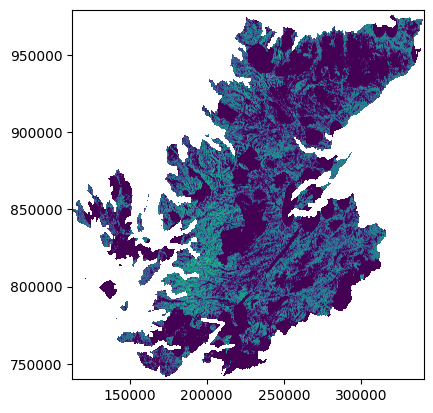

<Axes: >

In [19]:
# Plotting the suitability map without slope
show(solar_slope)

Figure 1A. Suitability map of solar farms in the Highland Council not including slope as a factor. Suitability appears as a gradient where lighter land is most suitable and dark land is unsuitable.

## References


Alldritt, D. and Hopwood, D. (2010). “Renewable energy in Scotland”. Renewable Energy Focus, 11(3), pp.28–33. doi:https://doi.org/10.1016/s1755-0084(10)70064-8.

ArcGIS Open Data. (2024). Highland Counsil Open Map data. Available at: https://map-highland.opendata.arcgis.com/datasets/d3ba297529eb4574a1a00a981e8fe58b_0/explore?location=0.000011%2C-4.958423%2C0.00. [Accessed 8 Dec. 2024].

Global Solar Atlas. (2019). GHI YearlyMonthlyTotals. Available at: https://globalsolaratlas.info/download/united-kingdom. [Accessed 8 Dec. 2024]

Global Wind Atlas. (n.d.). GBR wind speed 150m. Available at: https://globalwindatlas.info/en/download/gis-files. [Accessed 8 Dec. 2024]

Google. (2024). Google Colaboratory. Available at: https://colab.research.google.com/

Hunter, J. D. (2007). Matplotlib: A 2D graphics Environment. Computing in Science /& Engineering

Improvement Service. (2024). Town Centres – Scotland. Available at: https://data.spatialhub.scot/dataset/town_centres-is. [Accessed 8 Dec. 2024]

Kosmopoulos, P. (2023). “Solar irradiance and exploitation of the Sun’s power”. Elsevier eBooks, pp.1–20. doi: https://doi.org/10.1016/b978-0-12-823390-0.00006-5.

McMorran, C. (2024). Highland Council to object to Acheilidh Wind Farm with concerns over ‘positioning and prominence’ of turbines. Northern Times. Available at: https://www.northern-times.co.uk/news/highland-council-to-object-to-acheilidh-wind-farm-with-conce-364925/ [Accessed 11 Dec. 2024]

Murray, P. (2024). 10 turbine Caithness wind farm approved by Scottish Government despite Highland Council objection. Northern Times. Available at: https://www.northern-times.co.uk/news/10-turbine-caithness-wind-farm-approved-by-scottish-governme-361619/ [Accessed 11 Dec. 2024]

National Grid UK. (2024). Substation site. Available at: https://www.nationalgrid.com/electricity-transmission/network-and-infrastructure/network-route-maps. [Accessed 8 Dec. 2024]

NatureScot. (n.d.). Protected Areas [Vector data]. Available at: https://sitelink.nature.scot/map [Accessed 8 Dec. 2024]

Ordnance Survey. (2024). OS Open Roads [Vector data].  Available at: https://www.ordnancesurvey.co.uk/products/os-open-roads#get [Accessed 8 Dec. 2024]

Python Software Foundation. Python Language Reference, version 2.7. Available at: http://www.python.org

QGIS Development Team. (2024). QGIS Geographic Information System. Open Source Geospatial Foundation Project. Available at: http://qgis.osgeo.org

Renewables First (n.d.). Wind turbine fundamentals. Renewables First - The Renewable Energy Company. Available at: https://renewablesfirst.co.uk/renewable-energy-technologies/windpower/windpower-learning-centre/wind-turbine-fundamentals/. [Accessed 9 Dec. 2024]

Renewables First (n.d.). Wind turbine location and size - Renewables First. [online] Renewables First - The Renewable Energy Company. Available at: https://renewablesfirst.co.uk/renewable-energy-technologies/windpower/community-windpower/location-size-no-of-wind-turbines/.

Scotland Government (2014). Onshore wind turbines: planning advice. Available at: https://www.gov.scot/publications/onshore-wind-turbines-planning-advice/. [Accessed 10 Dec. 2024]

Scottish Renewables (2021). Renewable Energy Facts & Statistics. Available at: https://www.scottishrenewables.com/our-industry/statistics. [Accessed 10 Dec. 2024]

Sean Gilliet et al. (2013). Rasterio: geospatial raster I/0 for Python programmers. Available at: https://github.com/rasterio/rasterio.   

Searchland. (2024). What makes a site suitable for a solar farm? Available at: https://searchland.co.uk/blog/land-criteria-for-solar-farms. [Accessed 7 Dec. 2024]

SpatialData. (2020). Scotland Habitat and Land Cover Map (Vector Data). Scotland Government. Available at: https://spatialdata.gov.scot/geonetwork/srv/api/records/8462f345-6e9c-45de-b1d2-665a55b9d74a. [Accessed 8 Dec. 2024]

Sreckovic, A. (2024). “New Challenges in Exploring Solar Radiation: Influence, Consequences, Diagnostics, Prediction”. Applied Sciences. Available at: https://www.mdpi.com/journal/applsci/special_issues/New_Challenges_in_Exploring_Solar_Radiation [Accessed 11 Dec. 2024]

Strategic Land Group (2022). What makes a site suitable for a solar farm? - Strategic Land Group. Available at: https://www.strategiclandgroup.co.uk/insights/what-makes-a-site-suitable-for-a-solar-farm. [Accessed 9 Dec. 2024]

UK Parliament (2010). Wind Turbines (Minimum Distances from Residential Premises) Bill [HL].  UK Parliament Publications. Available at: https://publications.parliament.uk/pa/ld201011/ldbills/017/11017.1-i.html. [Accessed 11 Dec. 2024]